In [124]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('brand_campaign.csv')

# Ensure the DataFrame index is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data.set_index('Date', inplace=True)

# Ensure all necessary columns are in the correct format
data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')  # Convert Revenue to numeric


# Handle any missing values that may result from the conversion
data.dropna(inplace=True)

# Extract the column
revenue = data['Revenue']
sessions = data['Sessions']
campaign_spent = data['Campaign_spent']

# Calculate Pearson correlation coefficients and p-values
corr_rev_campaign, p_value_rev_campaign = pearsonr(revenue, campaign_spent)
corr_sess_campaign, p_value_sess_campaign = pearsonr(sessions, campaign_spent)
corr_rev_sess, p_value_rev_sess = pearsonr(revenue, sessions)

print(f'Correlation between Revenue and campaign_spent: {corr_rev_campaign}, p-value: {p_value_rev_campaign}')
print(f'Correlation between Sessions and campaign_spent: {corr_sess_campaign}, p-value: {p_value_sess_campaign}')


Correlation between Revenue and campaign_spent: 0.08517800132871879, p-value: 0.5287082347739762
Correlation between Sessions and campaign_spent: -0.031183696362114186, p-value: 0.8178805686168751
Correlation between Revenue and Sessions: 0.758660132803714, p-value: 8.111214464689484e-12



Train data size: (53, 3)
Test data size: (4, 3)

Training R2: 0.5879
Adjusted Training R2: 0.5714
Training RMSE: £188315.59
Estimated Cumulative Incremental Impact: £124906.16


Text(0, 0.5, 'Revenue')

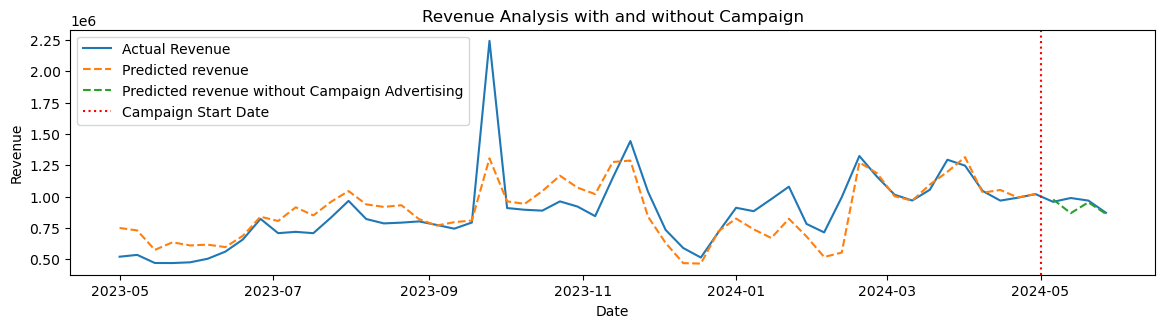

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('brand_campaign.csv')  # Ensure you have the correct CSV file

# Ensure the DataFrame index is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data.set_index('Date', inplace=True)

# Ensure all necessary columns are in the correct format
data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')  # Convert Revenue to numeric

# Handle any missing values that may result from the conversion
data.dropna(inplace=True)

# Assume campaign advertising started on a specific date
ad_start_date = pd.to_datetime('2024-05-01')  # Convert to datetime
train_data = data[data.index < ad_start_date]
test_data = data[data.index >= ad_start_date]

# Print the sizes of train and test data
print("\nTrain data size:", train_data.shape)
print("Test data size:", test_data.shape)

# Features and target variable for the model
X_train = train_data.drop(columns=['Revenue'])
y_train = train_data['Revenue']
X_test = test_data.drop(columns=['Revenue'])
y_test = test_data['Revenue']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast revenue
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the metrics
r2_train = model.score(X_train, y_train)
rmse_train = np.sqrt(np.mean((y_train - y_pred_train) ** 2))

# Calculate n and k
n = X_train.shape[0]  # number of observations
k = X_train.shape[1]  # number of features

# Calculate adjusted R-squared
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - k - 1)

# Calculate the incremental impact
incremental_impact = y_test.sum() - y_pred_test.sum()

# Print summary
print(f'\nTraining R2: {r2_train:.4f}')
print(f'Adjusted Training R2: {adjusted_r2_train:.4f}')
print(f'Training RMSE: £{rmse_train:.2f}')
print(f'Estimated Cumulative Incremental Impact: £{incremental_impact:.2f}')

# May 2024 actual revenue
actual_revenue_may_2024 = data[(data.index >= '2024-05-01') & (data.index <= '2024-05-31')]['Revenue']

# Visualization
plt.figure(figsize=(14, 7))

# Plot 1: Historical Revenue and Model Prediction
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Revenue'], label='Actual Revenue')
plt.plot(train_data.index, y_pred_train, label='Predicted revenue', linestyle='--')
plt.plot(test_data.index, y_pred_test, label='Predicted revenue without Campaign Advertising', linestyle='--')
plt.axvline(ad_start_date, color='r', linestyle=':', label='Campaign Start Date')
plt.legend()
plt.title('Revenue Analysis with and without Campaign')
plt.xlabel('Date')
plt.ylabel('Revenue')





23:26:53 - cmdstanpy - INFO - Chain [1] start processing
23:26:53 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat     yhat_lower    yhat_upper
53 2024-05-06  1.089220e+06  772712.743657  1.405038e+06
54 2024-05-13  1.097359e+06  784584.817579  1.416396e+06
55 2024-05-20  1.105498e+06  780399.260751  1.436408e+06
56 2024-05-27  1.113638e+06  797793.900101  1.435956e+06


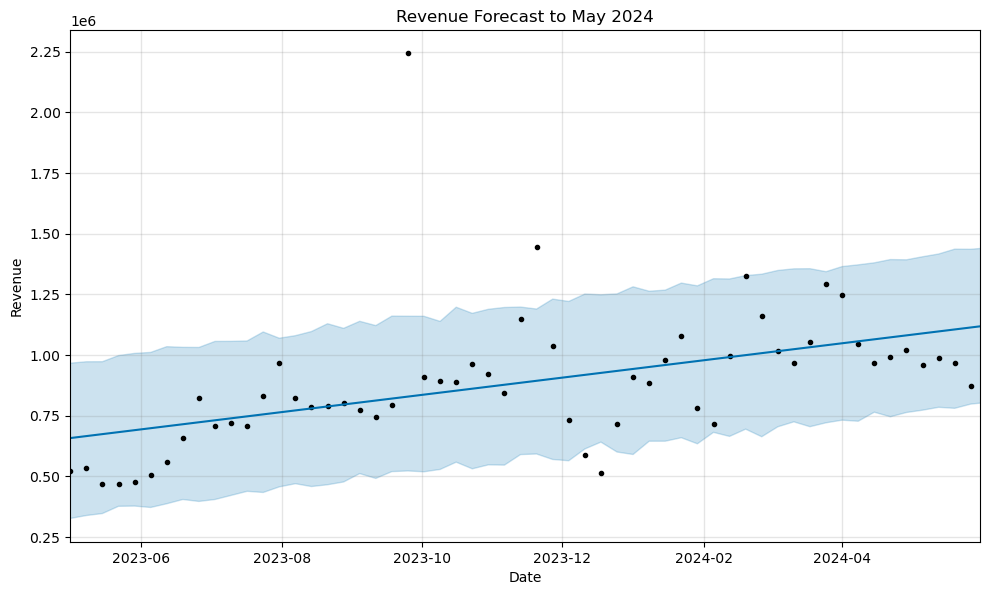

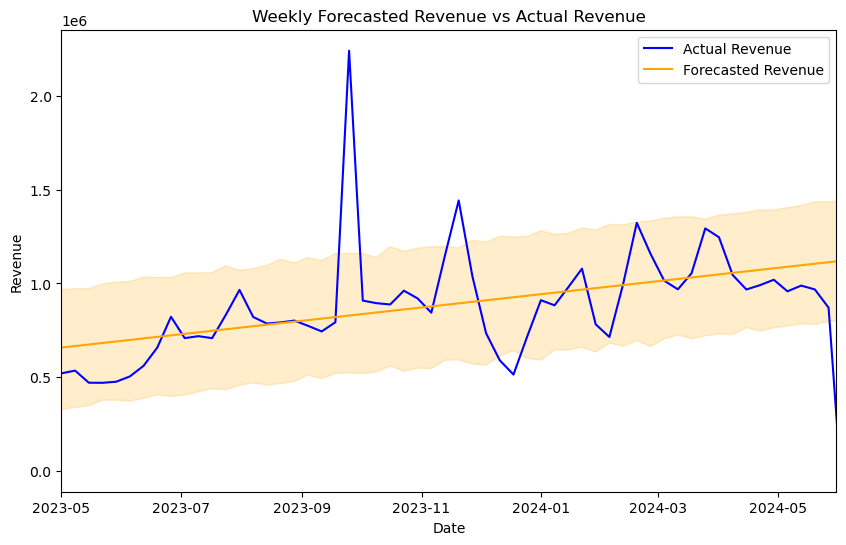

RMSE:249947.1106522187
R-squared: 0.2232
Adjusted R-squared: 0.1944


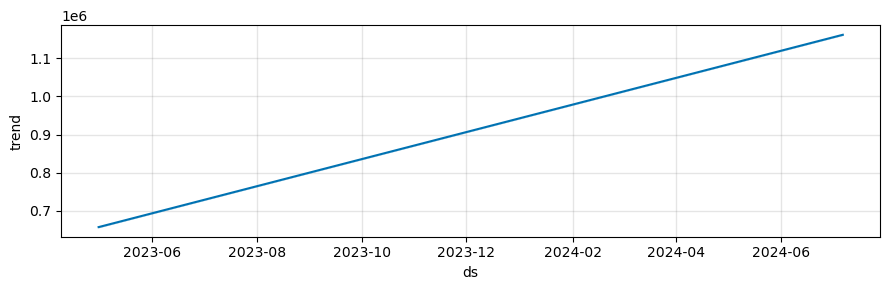

In [126]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Instantiate and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a dataframe with future dates for prediction until the end of May 2024
future_dates = model.make_future_dataframe(periods=6, freq='W')  # 6 weeks of future data

# Make predictions
forecast = model.predict(future_dates)

# Print forecast for May 2024
forecast_may_2024 = forecast[(forecast['ds'] >= '2024-05-01') & (forecast['ds'] <= '2024-05-31')]
print(forecast_may_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
ax.set_title('Revenue Forecast to May 2024')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.xlim(df_prophet['ds'].min(), pd.Timestamp('2024-05-31'))  # Convert to Timestamp
plt.show()

# Visualize weekly forecasted revenue vs actual revenue
# Include actual revenue before May 2024
actual_revenue = df_prophet.set_index('ds').reindex(forecast['ds']).fillna(0)
plt.figure(figsize=(10, 6))
plt.plot(actual_revenue.index, actual_revenue['y'], label='Actual Revenue', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Revenue', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.title('Weekly Forecasted Revenue vs Actual Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xlim(df_prophet['ds'].min(), pd.Timestamp('2024-05-31'))  # Convert to Timestamp
plt.legend()
plt.show()

# Checking the RMSE of the Prophet model
# Join the actual revenue with the forecast
metric_prophet = forecast.set_index('ds')[['yhat']].join(df_prophet.set_index('ds'), how='inner').dropna()

# Calculate RMSE
rms_prophet = mean_squared_error(metric_prophet['y'], metric_prophet['yhat'], squared=False)
print(f'RMSE:{rms_prophet}')

# Calculate R-squared for the Prophet model
ss_res = ((metric_prophet['y'] - metric_prophet['yhat']) ** 2).sum()  # Sum of squares of residuals
ss_tot = ((metric_prophet['y'] - metric_prophet['y'].mean()) ** 2).sum()  # Total sum of squares

r_squared = 1 - (ss_res / ss_tot)

# Calculate Adjusted R-squared
n = len(metric_prophet)  # Number of observations
p = 2  # Number of predictors (adjust based on your model; for Prophet, it can include seasonal components)

r_squared_adj = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f'R-squared: {r_squared:.4f}')
print(f'Adjusted R-squared: {r_squared_adj:.4f}')

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()


Estimated Cumulative Incremental Impact: £124906.16


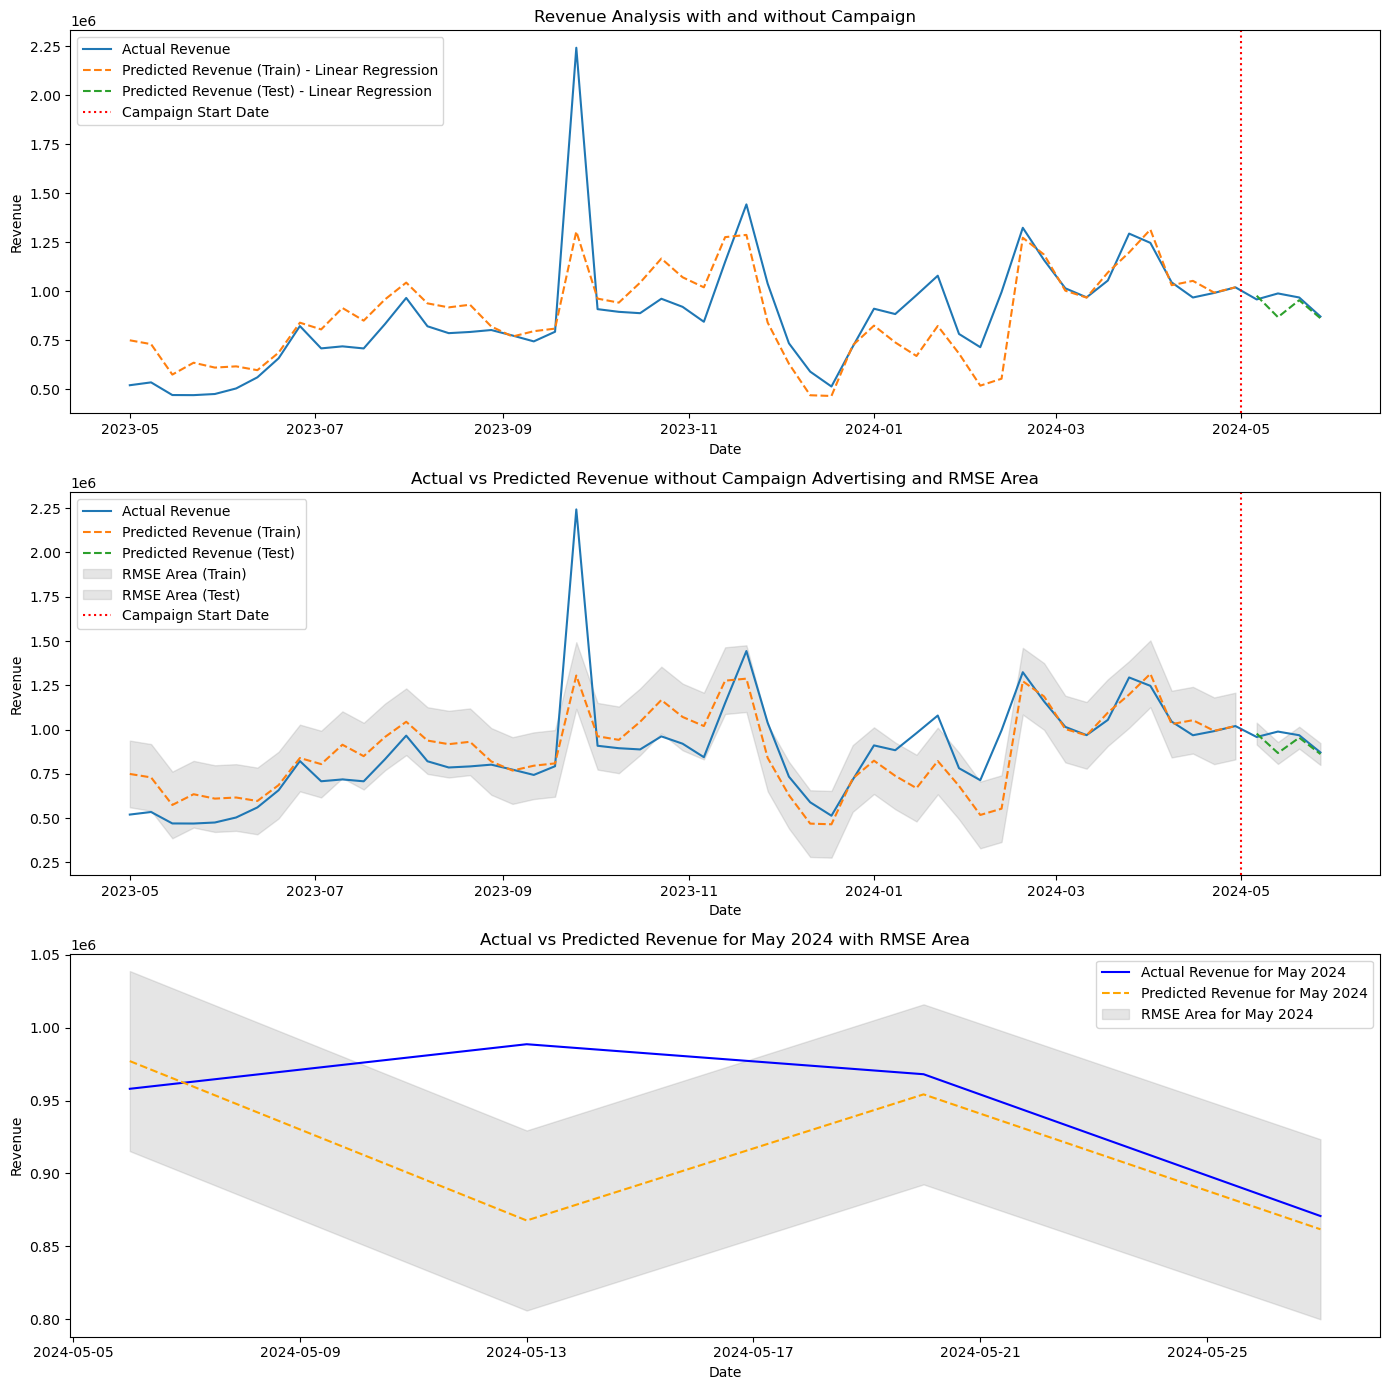

In [127]:
# Calculate the incremental impact
incremental_impact = y_test.sum() - y_pred_test.sum()
print(f'Estimated Cumulative Incremental Impact: £{incremental_impact:.2f}')

# Visualization
plt.figure(figsize=(14, 14))

#Actual Revenue and Model Prediction
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Revenue'], label='Actual Revenue')
plt.plot(train_data.index, y_pred_train_lr, label='Predicted Revenue - Linear Regression', linestyle='--')
plt.plot(test_data.index, y_pred_test_lr, label='Predicted Revenue - Linear Regression', linestyle='--')
plt.axvline(ad_start_date, color='r', linestyle=':', label='Campaign Start Date')
plt.legend()
plt.title('Revenue Analysis with and without Campaign')
plt.xlabel('Date')
plt.ylabel('Revenue')


# Shading the RMSE area
train_rmse_area_upper = y_pred_train_lr + rmse_train_lr
train_rmse_area_lower = y_pred_train_lr - rmse_train_lr
test_rmse_area_upper = y_pred_test_lr + rmse_test_lr
test_rmse_area_lower = y_pred_test_lr - rmse_test_lr

plt.fill_between(train_data.index, train_rmse_area_lower, train_rmse_area_upper, color='gray', alpha=0.2, label='RMSE Area ')
plt.fill_between(test_data.index, test_rmse_area_lower, test_rmse_area_upper, color='gray', alpha=0.2, label='RMSE Area ')

plt.axvline(ad_start_date, color='r', linestyle=':', label='Campaign Start Date')
plt.legend()
plt.title('Actual vs Predicted Revenue without Campaign Advertising and RMSE Area')
plt.xlabel('Date')
plt.ylabel('Revenue')

# Data for May 2024 with RMSE Area
plt.subplot(3, 1, 3)
actual_revenue_may_2024 = data[(data.index >= '2024-05-01') & (data.index <= '2024-05-31')]['Revenue']
may_2024_pred = y_pred_test[test_data.index.month == 5]
plt.plot(actual_revenue_may_2024.index, actual_revenue_may_2024, label='Actual Revenue for May 2024', color='blue')
plt.plot(actual_revenue_may_2024.index, may_2024_pred, label='Predicted Revenue for May 2024', linestyle='--', color='orange')

# Shading the RMSE area for May 2024
may_2024_rmse_area_upper = may_2024_pred + rmse_test_lr
may_2024_rmse_area_lower = may_2024_pred - rmse_test_lr

plt.fill_between(actual_revenue_may_2024.index, may_2024_rmse_area_lower, may_2024_rmse_area_upper, color='gray', alpha=0.2, label='RMSE Area for May 2024')

plt.legend()
plt.title('Actual vs Predicted Revenue for May 2024 with RMSE Area')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

